In [1]:
import cv2
import matplotlib.pyplot as plt
from os.path import join
from glob import glob
import pandas as pd

In [2]:
task3_GT = '../../data/ISIC2018_Task3_Training_GroundTruth'
task3_img = '../../data/ISIC2018_Task3_Training_Input'

In [3]:
df = pd.read_csv(join(task3_GT, 'ISIC2018_Task3_Training_GroundTruth.csv'))

In [4]:
df

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,ISIC_0034318,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,ISIC_0034319,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
for col in df.columns[1:]:
#     print(col, df[df[col]==1].shape[0], df[df[col]==1].shape[0]*0.2, df[df[col]==1].shape[0]/(df[df[col]==1].shape[0]*0.2))
    print(col + '\t' + str(df[df[col]==1].shape[0]))

MEL	1113
NV	6705
BCC	514
AKIEC	327
BKL	1099
DF	115
VASC	142


In [6]:
col

'VASC'

In [7]:
list(val_dict.keys())[1:]

NameError: name 'val_dict' is not defined

In [8]:
val_dict = {'image':[], 'MEL':[], 'NV':[], 'BCC':[], 'AKIEC':[], 'BKL':[], 'DF':[], 'VASC':[]}
train_dict = {'image':[], 'MEL':[], 'NV':[], 'BCC':[], 'AKIEC':[], 'BKL':[], 'DF':[], 'VASC':[]}
for col in df.columns[1:]:
    no_img = df[df[col]==1].shape[0]
    img_list = df.image[df[col]==1].to_list()
    no_val = int(no_img*0.2)
    no_train = int(no_img*0.8)
    print(col, no_img, no_val, no_train)
    for i in range(no_img):
        if i%5==0:
#             print(i)
            val_dict['image'].append(img_list[i])
            for k in list(val_dict.keys())[1:]:
                val_dict[k].append(1 if k==col else 0)
        else:
            train_dict['image'].append(img_list[i])
            for k in list(train_dict.keys())[1:]:
                train_dict[k].append(1 if k==col else 0)
#     break
#     print(len(val_dict), len(train_dict))

MEL 1113 222 890
NV 6705 1341 5364
BCC 514 102 411
AKIEC 327 65 261
BKL 1099 219 879
DF 115 23 92
VASC 142 28 113


In [9]:
val_df = pd.DataFrame(val_dict)
train_df = pd.DataFrame(train_dict)

In [18]:
for c in val_df.columns[1:]:
    print(c, len(val_df[val_df[c]==1]))

MEL 223
NV 1341
BCC 103
AKIEC 66
BKL 220
DF 23
VASC 29


In [19]:
for c in train_df.columns[1:]:
    print(c, len(train_df[train_df[c]==1]))

MEL 890
NV 5364
BCC 411
AKIEC 261
BKL 879
DF 92
VASC 113


In [17]:
a = []
for c in df.columns[1:]:
    a.append((df[c]==1).sum())
print(a)
print(a/sum(a))

[1113, 6705, 514, 327, 1099, 115, 142]
[0.1111333  0.66949576 0.05132302 0.03265102 0.1097354  0.01148278
 0.01417873]


In [139]:
for i in list(df['image']):
    a = df[df['image']=='ISIC_0024418'].apply(lambda x: df.columns[x==1], axis = 1).to_string(header=False)
    print(a.split()[1][8:-3])
#     import pdb;pdb.set_trace()
#     print(df[df['image']=='ISIC_0024323'].where(df.columns.values==1))
#     print(df[df['image']==i].columns.values)
    break

AKIEC


MEL


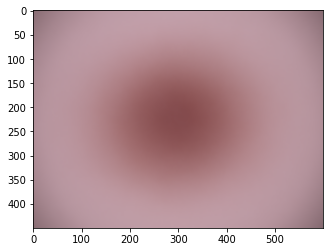

NV


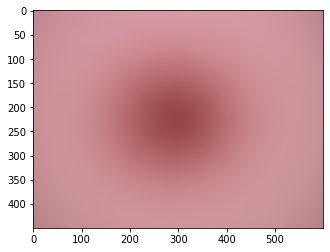

BCC


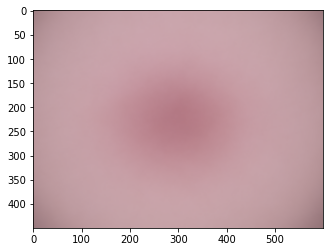

AKIEC


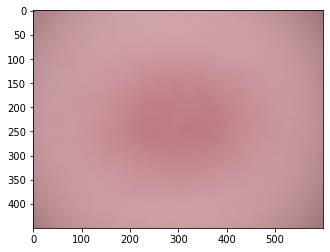

BKL


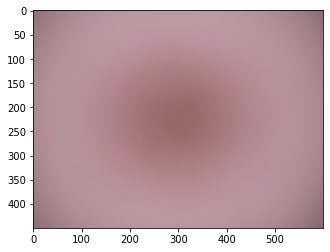

DF


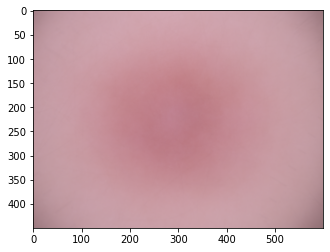

VASC


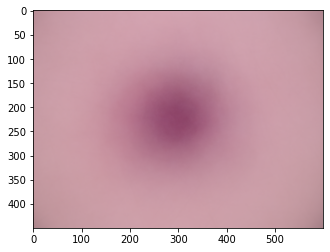

In [50]:
import numpy as np
for col in df.columns[1:]:
    tmp = np.ones([450, 600, 3])*255
    img_list = df['image'].loc[df[col]==1]
    weight = 1/len(img_list)
    for i in img_list:
        img = cv2.imread(join(task3_img, i+'.jpg'))
        tmp += weight*img 
    print(col)
    plt.imshow(cv2.cvtColor(tmp.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.show()

In [38]:
df.columns[1:]

Index(['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object')

In [30]:
img = cv2.imread(join(task3_img, i+'.jpg'))
img.shape

(450, 600, 3)

In [42]:
a = np.ones([2, 4, 3])*255

In [46]:
a

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]]])

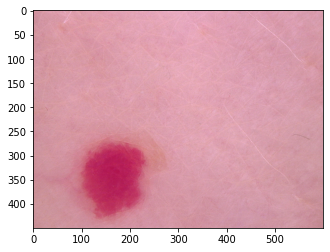

In [34]:
img = cv2.cvtColor(cv2.imread('../../data/ISIC2018_Task3_Training_Input/ISIC_0025677.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [12]:
img.shape

(450, 600, 3)

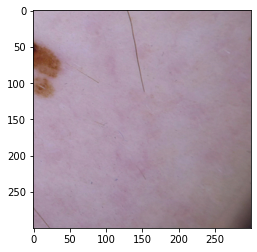

In [13]:
plt.imshow(img[150:450, 300:600])
plt.show()

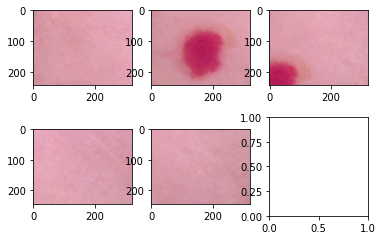

In [24]:
img = cv2.cvtColor(cv2.imread("../../data/ISIC2018_Task3_Training_Input/ISIC_0025915.jpg"), cv2.COLOR_BGR2RGB)
h,w,c = img.shape
a = img[0:int(h/2)+20, 0:int(w/2)+20]
b = img[int(h/2)-20:h, 0:int(w/2)+20]
c = img[0:int(h/2)+20, int(w/2)-20:w]
d = img[int(h/2)-20:h, int(w/2)-20:w]
e = img[int(h/2)-122:int(h/2)+123, int(w/2)-160:int(w/2)+160]
f, axarr = plt.subplots(2,3)
axarr[0,0].imshow(a)
axarr[0,1].imshow(b)
axarr[1,0].imshow(c)
axarr[1,1].imshow(d)
axarr[0,2].imshow(e)

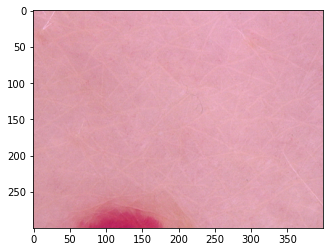

In [32]:
r=0
c=1
plt.imshow(img[50*r:50*r+300, 50*c:50*c+400])
plt.show()

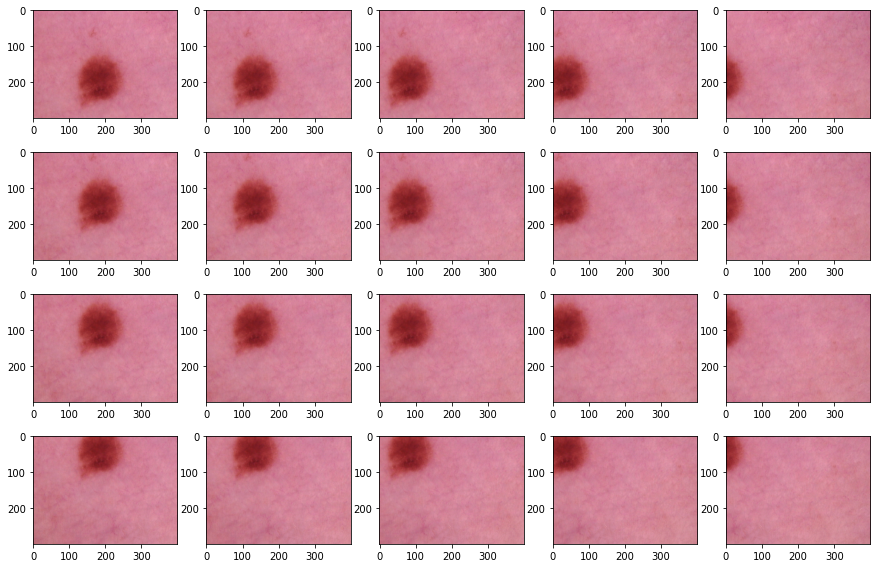

In [35]:
img = cv2.cvtColor(cv2.imread("../../data/ISIC2018_Task3_Training_Input/ISIC_0025894.jpg"), cv2.COLOR_BGR2RGB)
h,w,c = img.shape
f, axarr = plt.subplots(4,5, figsize=(15,10))
for r in range(4):
    for c in range(5):
        axarr[r,c].imshow(img[50*r:50*r+300, 50*c:50*c+400])

-2
6006


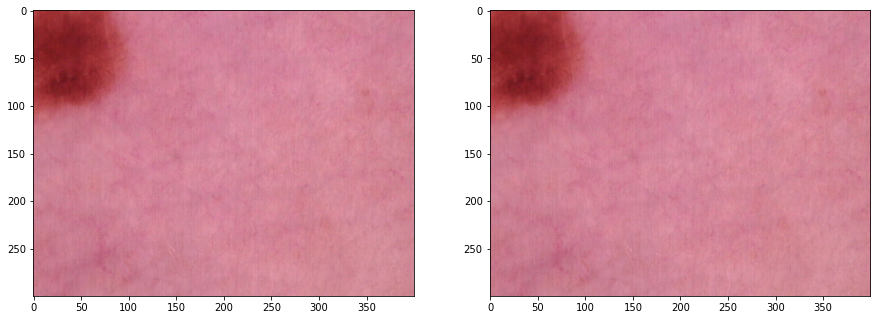

In [60]:
import numpy as np
from itertools import cycle
import random
image = img[50*r:50*r+300, 50*c:50*c+400]
h, w, c = image.shape

x = np.random.choice(h, 77, replace=False)
y = np.random.choice(w, 78, replace=False)
idx_list = []
for i in range(len(x)):
    for j in range(len(y)):
        idx_list.append((x[i], y[j]))

val = random.randint(-5, 5)
print(val)
print(len(idx_list))
image_t = image.transpose(1, 0, 2)
image_t[idx_list] += np.uint8(val)
image = image_t.transpose(1, 0, 2)
f, axarr = plt.subplots(1,2, figsize=(15,10))
axarr[0].imshow(img[50*r:50*r+300, 50*c:50*c+400])
axarr[1].imshow(image)

In [56]:
import itertools
letterList = [1, 2]
bigramList = ['ab', 'cd', 'ef']
a = []
for i in range(len(letterList)):
    for j in range(len(bigramList)):
        a.append((letterList[i], bigramList[j]))
print(a)

[(1, 'ab'), (1, 'cd'), (1, 'ef'), (2, 'ab'), (2, 'cd'), (2, 'ef')]


In [32]:
from os.path import join, basename
img_list = glob(join(task3_img, '*.jpg'))
h, w, c = img.shape
for i in img_list:
    img = cv2.imread(i)
    a = img[0:int(h/2)+20, 0:int(w/2)+20]
    b = img[int(h/2)-20:h, 0:int(w/2)+20]
    c = img[0:int(h/2)+20, int(w/2)-20:w]
    d = img[int(h/2)-20:h, int(w/2)-20:w]
    e = img[int(h/2)-122:int(h/2)+123, int(w/2)-160:int(w/2)+160]
    cv2.imwrite(join('./test_pre/', basename(i)[:-4] + '_a.jpg'), a)
    cv2.imwrite(join('./test_pre/', basename(i)[:-4] + '_b.jpg'), b)
    cv2.imwrite(join('./test_pre/', basename(i)[:-4] + '_c.jpg'), c)
    cv2.imwrite(join('./test_pre/', basename(i)[:-4] + '_d.jpg'), d)
    cv2.imwrite(join('./test_pre/', basename(i)[:-4] + '_e.jpg'), e)

In [12]:
from os.path import join, basename
img_list = glob(join(task3_img, '*.jpg'))
h, w, c = img.shape
for i in img_list:
    img = cv2.imread(i)
    count = 0
    for r in range(4):
        for c in range(5):
            cv2.imwrite(join('../test_pre/', f'{basename(i)[:-4]}_{count}.jpg'), img[50*r:50*r+300, 50*c:50*c+400])
            count+=1

In [45]:
import numpy as np
a = np.array(([1,2,3], [4,5,6], [7,8,9], [10,11,12], [13,14,15], [16,17,18]))

In [46]:
a.shape

(6, 3)

In [69]:
x = np.random.choice(a.shape[0], 5, replace=False)  
y = np.random.choice(a.shape[1], 3, replace=False)  

In [70]:
a[x,y]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (5,) (3,) 

In [71]:
x

array([0, 1, 4, 2, 5])

In [72]:
y

array([2, 1, 0])

In [111]:
from itertools import cycle
z = list(zip(cycle(y),x))

In [113]:
zt = np.array(z).T
at = np.array(a).T
at[zt]+=5

IndexError: index 4 is out of bounds for axis 0 with size 3

In [106]:
at.T

array([[ 1,  2,  8],
       [ 4, 10,  6],
       [ 7,  8, 14],
       [10, 11, 12],
       [18, 14, 15],
       [16, 22, 18]])

In [103]:
np.array(z).T.tolist()

[[2, 0], [1, 1], [0, 4], [2, 2], [1, 5]]

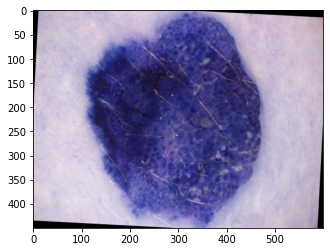

In [116]:
import imutils
plt.imshow(imutils.rotate(img, -3))
plt.show()

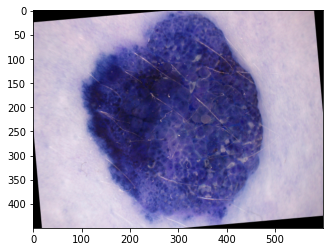

In [118]:
plt.imshow(imutils.rotate(img, 5))
plt.show()